In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
U_0 = 10
z_0 = 0.0001
D = 100
z_H = 100
C_T = 0.8
s_x = 10
s_y = 10
s_d = s_x*D
s_c = s_y*D
kappa = 0.4

d = 400 * D
l_farm = int(12000)
w_farm = int(12000 + (2*D/2))
h_farm = D
k_w = 0.01
A_0 = (w_farm * h_farm) + (2 * w_farm * k_w * l_farm) + (2 * h_farm * k_w * l_farm) + (4 * (k_w * l_farm)**2)
c_t = (np.pi * C_T * D**2) / (8 * s_d * s_c)
nu_star = 28 * np.sqrt(c_t)
beta =  nu_star / (1 + nu_star)
z_0WF = z_H * (1 + D / (2 * z_H))**beta * np.exp(-kappa * (c_t + (kappa / np.log((z_H / z_0) * (1 - D / (2 * z_H))**beta))**2)**-0.5)

x_1 = -l_farm
x_2 = 0
x_3 = 400*D
x = np.linspace(x_1, x_3-1, int(x_3-x_1))

h_1 = np.full_like(x, np.nan, dtype=float)
h_2 = np.full_like(x, np.nan, dtype=float)

U = np.full_like(x, np.nan, dtype=float)
U[0] = U_0

alpha_1 = 0.8
ratios = np.linspace(1, 1.03, 200)
alpha_2 = {}
kx = {}

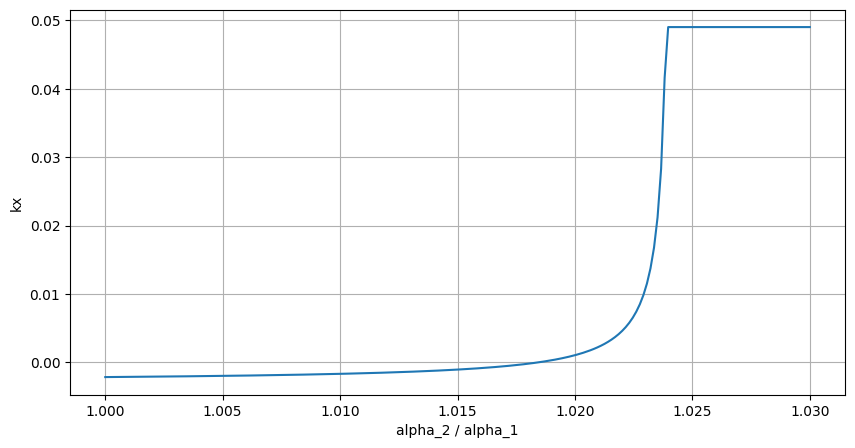

In [ ]:
# Loop over ratios
fig, ax = plt.subplots(figsize=(10,5))

for r in ratios:

    alpha_2[r] = r * alpha_1

    h_1[x >= x_1] = z_H + ((x[x >= x_1] - x_1) / z_0WF)**alpha_1 * z_0WF
    h_2[x >= x_2] =   0 + ((x[x >= x_2] - x_2) / z_0WF)**alpha_2[r] * z_0WF

    idx1 = h_1 >= z_H
    U[idx1] = U_0 * (np.log(h_1[idx1] / z_0) * np.log(z_H / z_0WF)) / (np.log(h_1[idx1] / z_0WF) * np.log(z_H / z_0))

    idx2 = (x >= x_2) & (h_2 >= z_H)
    U[idx2] = U_0 * (np.log(h_1[idx2] / z_0) * np.log(h_2[idx2] / z_0WF)) / (np.log(h_1[idx2] / z_0WF) * np.log(h_2[idx2] / z_0))

    for i in range(1, len(U)):
        if U[i] > U_0*0.9999:
            U[i] = U_0*0.9999
        elif U[i] < 0:
            U[i] = 0

    u_s = (U_0 - U[-1]) / U_0

    kx[r] = (- h_farm/4 - w_farm/4 + (np.sqrt(h_farm**2 + 2*A_0 + w_farm**2 - 4*A_0 + 4*(A_0 * (c_t / (2*(u_s - u_s**2))))))/4)/d
    #print('kx:', kx[r])

ax.plot(ratios, [kx[r] for r in ratios])
plt.xlabel('alpha_2 / alpha_1')
plt.ylabel('kx')
plt.grid(True)
plt.show()